# ZEWK - Hands On Datenvisualisierung, Visualisierungspipeline in Python
Seminar von Letty und Karen  

Dieses Notebook dient als Beispiel für die Implementation einer Datenvisualisierungspipeline in der Sprache Python. Es kann sowohl in Jupyter als auch in Jupyter Lab ausgeführt werden, jedoch können sich einzelne Shortcuts unterscheiden.

## Benutzung von Jupyter (Lab)

Hier ein paar praktische und wichtige Kommandos und Tastenkombinationen die ihr kennen solltet:
Außerhalb einer Zelle:

* ENTER - Zelle editieren  
* strg + ENTER - Zelle ausführen  
* shift + ENTER - Zelle ausführen und zur nächsten gehen  


Innerhalb einer Zelle (Editiermodus der Zelle):

* ESC - Zelle verlassen  
* D, D - Zelle löschen  
* A - leere Zelle oberhalb (above) einfügen  
* B - leere Zelle unterhalb (below) einfügen  


### Setup von hilfreichen Python Packages

In [1]:
%matplotlib inline 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Fragestellungen?
Ausgehend vom gegebenen Datensatz, welche Fragestellungen würden uns interessieren? Viele parameter zur Auswahl, aber der Datensatz hat teilweise große systematische Lücken. 

1. Wie ist das GDP in Europa und weltweit verteilt?
2. Gibt es einen Zusammenhang zwischen GDP und Lebenserwartung in Europa?  
3. Wie entwickelt(e) sich die Anzahl der Tests pro Land über die Zeit?

# Visualisierungspipeline
Die Visualisierungspipeline besteht aus den folgenden Schritten:
1. Datenaufbereitung (Data Analysis) inkl. Filtern: Aufbereitung der Rohdaten, Auswahl welche Daten gezeigt werden sollen
2. Mapping: Konzeption der Graphik, wie soll etwas dargestellt werden?
3. Rendering: Erstellen (und exportieren) der Graphik

## Datenaufbereitung (Data Analysis) - Was haben wir? Was zeigen wir?
Ausgangspunkt sind die Rohdaten (Importieren), diese werden Aufbereitet (Qualitätsanalyse, Ausreißeranalyse, Analyse fehlender Werte, Reduzierung der Datenmenge(?), Aggregation und Umwandeln von Daten)  
Auswahl von relevanten Parametern aber auch Subgruppen, aber auch exkludieren von z.B. Ausreißern (mit vorsicht!). 

In [2]:
# Datenimport
data = pd.read_excel("owid-covid-data.xlsx") 
data['date']= pd.to_datetime(data['date']) # Umwandeln von string format zu datetime format

# Vorverarbeitung der Daten
# Ausreißer Analyse


# Reduktion der Datenmenge
# nur jeweils die ersten einträge pro land werden genommen
data_sample = data.groupby("location").first()
data_sample = data_sample.reset_index()

In [3]:
# Parameterauswahl 
# Auswahl von Parametern, die wir für die weitere Verarbeitung benötigen
data_gdp = data_sample[['iso_code', 'continent', 'location', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'life_expectancy']]
data_gdp = data_gdp.dropna()
data_gdp = data_gdp.reset_index()

# Filtern von bestimmten Ländern
data_gdp_EU = data_gdp.loc[data_gdp.continent == "Europe"]

In [13]:
# Parameterauswahl
data_tests = data[['iso_code', 'continent', 'location', 'date', 'total_cases', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units',]]
data_EU = data_tests.loc[data_tests.continent == "Europe"]

## Mapping - Wie zeigen wir es?
Konzeptionsphase der Visualisierung, welches Diagramm soll verwendet werden und welche graphischen Primitiven? Welche Farben sollen verwendet werden? Muss etwas bei der Skalierung beachtet werden? 

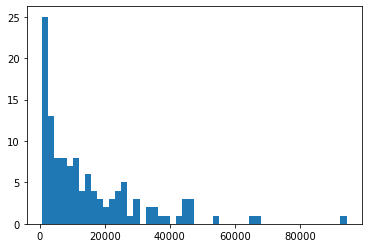

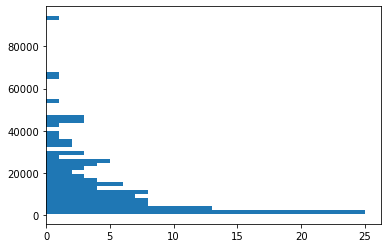

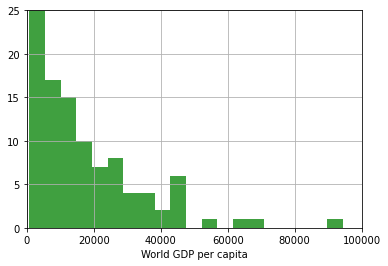

In [5]:
# Histogram examples with matplotlib 
x = data_gdp.gdp_per_capita

plt.hist(x, bins=50) 
plt.show() # Zeigt den Plot an

plt.hist(x, bins=50, orientation="horizontal") 
plt.show() # Zeigt den Plot an

plt.hist(x, bins=20, facecolor='green', alpha=0.75) 
plt.axis([0, 100000, 0, 25]) # Ändert die Achsenskalierung
plt.grid(True) # Zeichnet Grid
plt.xlabel("World GDP per capita") # Fügt X Achsen Beschreibung hinzu
plt.show() # Zeigt den Plot an

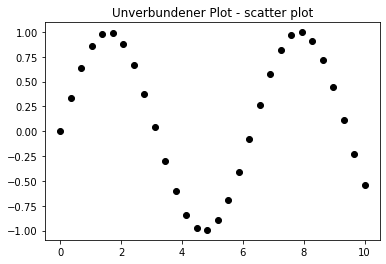

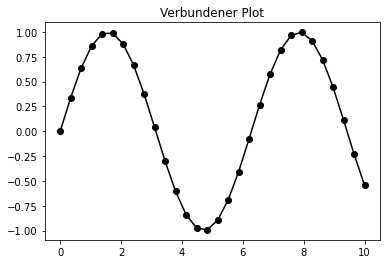

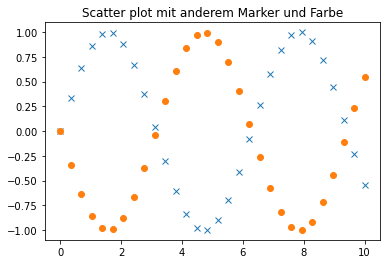

In [6]:
# scatter plot examples mit matplotlib https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');
plt.title("Unverbundener Plot - scatter plot")
plt.show()
plt.title("Verbundener Plot")
plt.plot(x, y, '-o', color='black');
plt.show()

# Mögliche Marker: 'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'
ax = plt.plot(x, y, 'x', x, -y, 'o');
plt.title("Scatter plot mit anderem Marker und Farbe")
plt.show()

# Mögliche Parameter: color='gray', markersize=15, linewidth=4, markerfacecolor='white', markeredgecolor='gray', markeredgewidth=2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


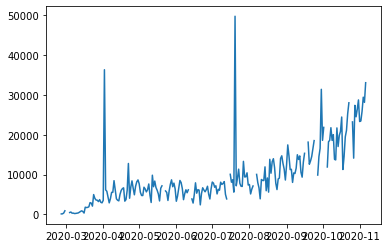

In [7]:
# Filtern von bestimmten Ländern
data_AU = data.loc[data.location == "Austria"]

fig, ax = plt.subplots()
ax.plot(data_AU.date, data_AU.new_tests, '-')
# plt.xticks(rotation=90) # rotieren der labels für bessere lesbarkeit
plt.show()

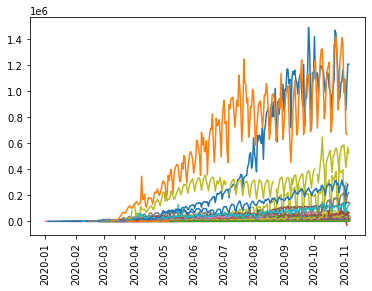

In [8]:
# 
countries = data.location.unique()

fig, ax = plt.subplots()
for country in countries:
    data_temp = data.loc[data.location == country]
    ax.plot(data_temp.date, data_temp.new_tests, '-')
plt.xticks(rotation=90) # rotieren der labels für bessere lesbarkeit
plt.show()

## Rendern - Erstellen und exportieren.
Erzeugen der eigentlichen Graphik.

### 1. Wie ist das GDP in Europa und weltweit verteilt?

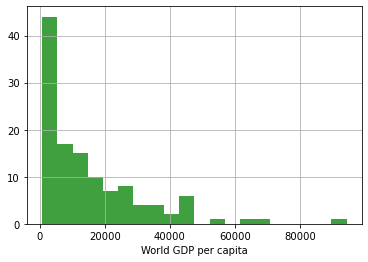

In [9]:
# Histogram examples with matplotlib 
x = data_gdp.gdp_per_capita

plt.hist(x, bins=20, facecolor='green', alpha=0.75) 
plt.grid(True) # Zeichnet Grid
plt.xlabel("World GDP per capita") # Fügt X Achsen Beschreibung hinzu
plt.show() # Zeigt den Plot an

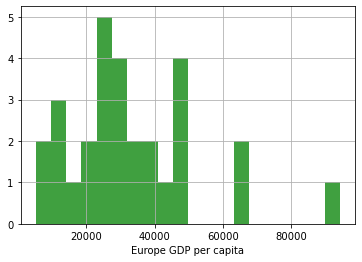

In [10]:
# Histogram examples with matplotlib 
data_gdp_EU = data_gdp.loc[data_gdp.continent == "Europe"]
x = data_gdp_EU.gdp_per_capita

plt.hist(x, bins=20, facecolor='green', alpha=0.75) 
plt.grid(True) # Zeichnet Grid
plt.xlabel("Europe GDP per capita") # Fügt X Achsen Beschreibung hinzu
plt.savefig("histogram_gdp_EU.svg")
plt.show() # Zeigt den Plot an

### 2. Gibt es einen Zusammenhang zwischen GDP und Lebenserwartung in Europa?  

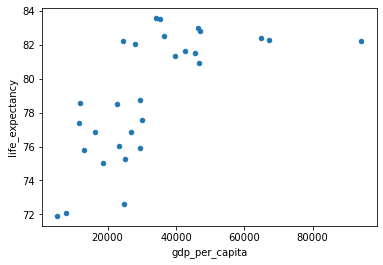

In [11]:
# Scatter plot gdp vs life expectancy
ax=data_gdp_EU.plot.scatter(x='gdp_per_capita', y='life_expectancy')
plt.xlabel("gdp_per_capita")
plt.ylabel("life_expectancy")

#d = np.polyfit(data_gdp_EU.gdp_per_capita, data_gdp_EU.life_expectancy,1)
#f = np.poly1d(d)
#f(data_gdp_EU.gdp_per_capita)
#x = data_gdp_EU.gdp_per_capita
#y = data_gdp_EU.life_expectancy
#ax = plt.plot(x, f(x), '--y')
plt.savefig("2 - GDP world wide.svg")

### 3. Wie entwickelt(e) sich die Anzahl der Tests pro Land über die Zeit?

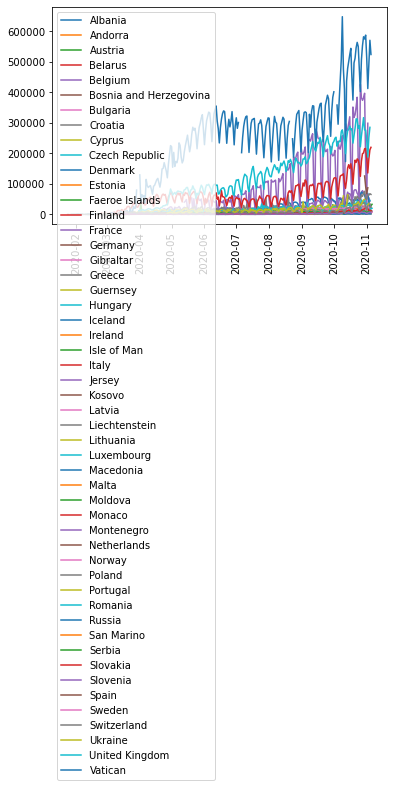

In [14]:
countries = data_EU.location.unique()

fig, ax = plt.subplots()
for country in countries:
    data_temp = data.loc[data.location == country]
    ax.plot(data_temp.date, data_temp.new_tests, '-', label=country)
plt.xticks(rotation=90) # rotieren der labels für bessere lesbarkeit
plt.legend()
plt.savefig("3 - new tests timeline.svg")
plt.show()


# Python specific - Seaborn Package
https://seaborn.pydata.org/examples/index.html  
More complex data, easy code

<AxesSubplot:xlabel='gdp_per_capita', ylabel='life_expectancy'>

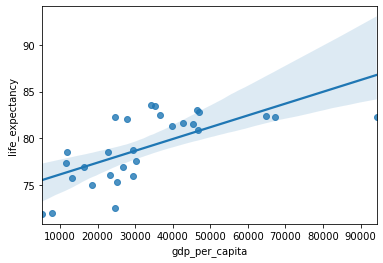

In [15]:
sns.regplot(x="gdp_per_capita", y="life_expectancy", data=data_gdp_EU)

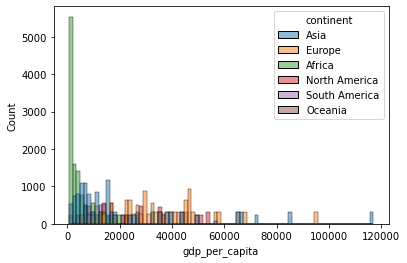

In [16]:
sns_plot = sns.histplot(data=data, x="gdp_per_capita", hue="continent") # , element="step", stat="density", common_norm=False, cumulative=True)
sns_plot.figure.savefig("2 sns - GDP world wide.svg")

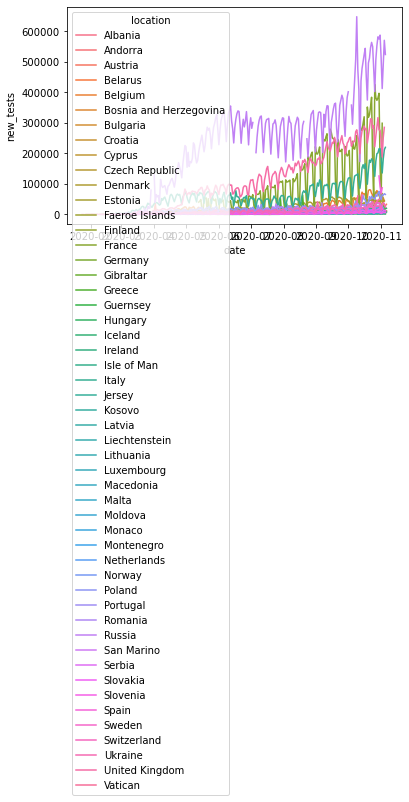

In [17]:
sns_plot = sns.lineplot(data=data_EU, x="date", y="new_tests", hue="location")
sns_plot.figure.savefig("3 sns - new tests timeline.svg")